# Example of post analysis of LiDAR metrics of tree in forestry

This is a continue section of LiDAR data processing after finishing `pine.las` analysis and export geojson

In [52]:
!pip install geopandas scikit-learn matplotlib --quiet

In [53]:
import geopandas as gpd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

## Read exported geojson

In [54]:
trees = gpd.read_file('./pine_tree_metrics_convex.geojson')

Show what tabular data looks like

In [55]:
trees.iloc[:, :-1]

,treeID,Total_all_return_count,Total_first_return_count,Total_all_return_count_above_minht,Return_1_count_above_minht,Return_2_count_above_minht,Return_3_count_above_minht,Return_4_count_above_minht,Return_5_count_above_minht,Return_6_count_above_minht,...,Percentage_first_returns_above_mean,Percentage_first_returns_above_mode,Percentage_all_returns_above_mean,Percentage_all_returns_above_mode,X_All_returns_above_mean_Total_first_returns_100,X_All_returns_above_mode_Total_first_returns_100,First_returns_above_mean,First_returns_above_mode,All_returns_above_mean,All_returns_above_mode
0,1.0,255,183,255,183,63,9,0,0,0,...,54.509804,52.941176,58.431373,56.078431,81.420765,78.142077,139,135,149,143
1,2.0,454,347,449,343,89,17,0,0,0,...,56.167401,11.453744,60.792952,11.453744,79.538905,14.985591,255,52,276,52
2,3.0,200,158,200,158,40,2,0,0,0,...,52.000000,19.500000,56.500000,19.500000,71.518987,24.683544,104,39,113,39
3,4.0,130,124,130,124,6,0,0,0,0,...,46.153846,46.153846,46.153846,46.153846,48.387097,48.387097,60,60,60,60
4,5.0,634,406,633,406,181,45,1,0,0,...,47.791798,13.880126,53.943218,13.880126,84.236453,21.674877,303,88,342,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,712.0,512,377,511,377,119,15,0,0,0,...,50.195312,9.179688,54.687500,9.179688,74.270557,12.466844,257,47,280,47
683,713.0,201,131,201,131,62,8,0,0,0,...,41.791045,53.731343,46.766169,64.179104,71.755725,98.473282,84,108,94,129
684,714.0,429,254,429,254,137,38,0,0,0,...,51.048951,38.927739,64.801865,42.890443,109.448819,72.440945,219,167,278,184
685,715.0,420,312,420,312,99,9,0,0,0,...,55.000000,39.047619,60.238095,40.952381,81.089744,55.128205,231,164,253,172


Example data analysis in data science with no label dataset is to do unsupervised classification. So that, K-Means is purposed to do Elbow from 2 to 20 clusters

In [56]:
X = trees.iloc[:, 1:-1]
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

Best practice of Elbow method finding optimum number of cluster in K-Means, we perform knee point calculation

In [57]:
import numpy as np

def find_knee_point(data: np.ndarray) -> tuple[int, int|float , float|int]:
    
    # Convert to NumPy arrays
    x = np.arange(len(data))
    y = np.array(data)

    # Calculate line between first and last point
    p1 = np.array([0, y[0]])
    p2 = np.array([len(data) - 1, y[-1]])
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])  # Slope
    b = p1[1] - m * p1[0]  # Y-intercept

    # Calculate distances of each point from the line
    distances = np.abs(y - (m * x + b)) / np.sqrt(1 + m**2)

    # Knee point is the one with the maximum distance
    knee_idx = np.argmax(distances)
    return knee_idx, x[knee_idx], y[knee_idx]

The optimum number of clusters is defined by knee point. That's mean it is a good number of dataset should split into classes

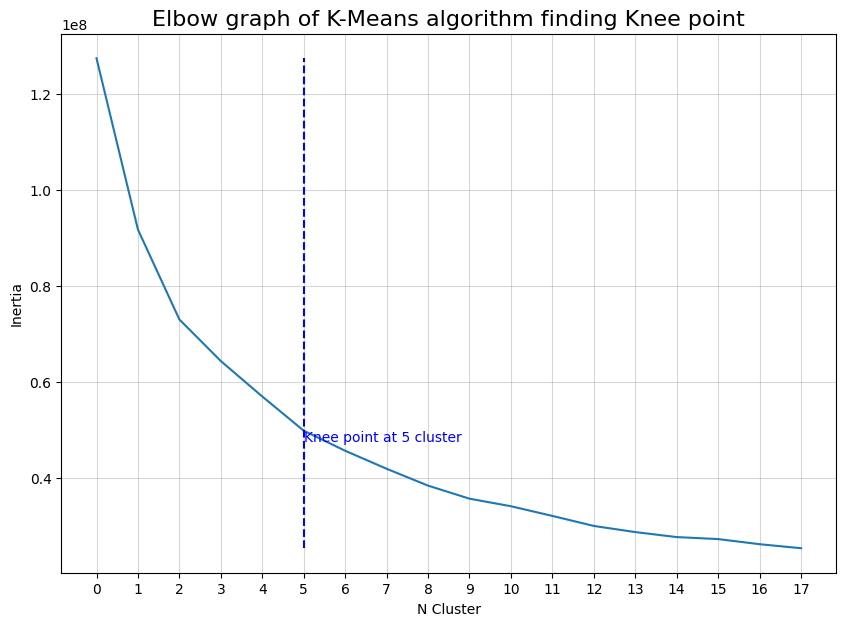

In [58]:

    plot_metric = np.asarray(distorsions)
    idx, x, y = find_knee_point(plot_metric)
    
    
    plt.figure(figsize=(10, 7))

    plt.plot(distorsions)

    plt.xticks(np.arange(len(plot_metric)), np.arange(len(plot_metric)), rotation=0)

    plt.vlines(x, plot_metric.min(), plot_metric.max(), color='blue', linestyle='dashed')
    plt.text(x, plot_metric.mean()-2, f'Knee point at {x} cluster', color='blue')

    plt.ylabel('Inertia')
    plt.xlabel('N Cluster')

    plt.title('Elbow graph of K-Means algorithm finding Knee point', fontsize=16)
    plt.grid(alpha=.5)
    plt.show()